## Artificial & Computational Intelligence

### Assignment : 6 (Problem Statement)

A group of birds constitute a swarm. 
A bird randomly starts searching for food from a food source (represented in the green nodes) by following the trail of the swarm (as shown in the diagram with the blue lines). 
The sight of the bird is limited to its immediate neighbouring food source. 
The bird need not remember the previous food sources.The goodness of a food source is determined by the number of other food sources reachable from it.


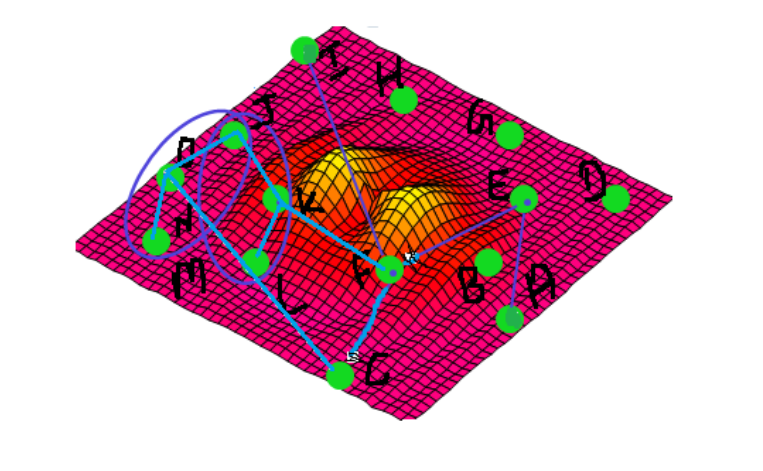

### PEAS Definition

PEAS (Performance, Environment, Actuators, Sensors) is for specifying the task environment. In designing an
agent, the first step must always be to specify the task environment as fully as possible.

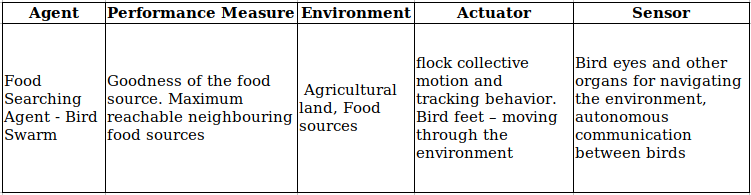

#### Notebook Initialization

In [1]:
from numpy import exp
import numpy as np
from numpy.random import randn
from numpy.random import rand

import pandas as pd
#import sklearn as sk
import seaborn as sns
import scipy as scipy

%matplotlib inline
import matplotlib as matplot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 4)
np.random.seed(2021)

#### NOTE:

This notebook uses the below mentioned versions of the following libraries.  
So please have your libraries updated in order to execute this notebook.

In [2]:
print("numpy:", np.__version__)
print("pandas:", np.__version__)
print("seaborn:", sns.__version__)
#print("sklearn:", sk.__version__)
print("matplotlib:", matplot.__version__)
print("scipy:", scipy.__version__)

numpy: 1.20.3
pandas: 1.20.3
seaborn: 0.11.0
matplotlib: 3.3.4
scipy: 1.6.2


### Environment Representation

As node M is outside the environment we are neglecting it. Thus our environment has 14 nodes and 11 edges. 

In [3]:
# number of food sources in the given environment
number_of_nodes = 14

In [4]:
# env_rep_mat contains the entire representation of the given environment

env_rep_mat = [
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]]

In [5]:
to_plot = []
nodes = ['A','B','C','D','E','F','G','H','I','J','K','L','N','O']
for i in range(0,len(env_rep_mat)):
    sum = 0
    for j in range(0,len(env_rep_mat)):
        if ((env_rep_mat[i][j]) == 1):
            sum = sum + 1
    to_plot.append(sum-1)
            

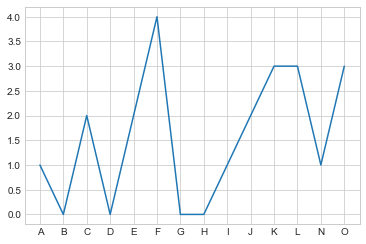

In [6]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = nodes
ax.plot(x, to_plot);

### Local Search Algorithms

(1) Hill Climbing -- and all the variations of it (Stochastic, First-choice,  random- restart, etc..)  
(2) Simulated Annealing  
(3) Local Beam Search  
(4) Genetic Algorithms

After carefull decision making based on the nature of the problem and environment, we decided to go with Simulated Annealing algorithm at first. (Detailed reasons for arriving at this conclusion are mentioned in design document) 

### Custom Simulated Annealing Implementation

Initializing the objects for later applications

In [7]:
class Node:
    def __init__(self, node_no, connections, to_list):
        self.node_no = node_no
        self.connections = connections
        self.to_list = to_list

nodes_arr = []

for i in range(0, len(env_rep_mat)):
    sum = 0
    to_list = []
    for j in range(0, len(env_rep_mat)):
        if (((env_rep_mat[i][j]) == 1) and (i != j)):
            sum = sum + 1
            to_list.append(j)
    nodes_arr.append(Node(i, sum, to_list))

custom implementation of simulated annealing in python. Reason for choosing the temp function is explained in design doc.

In [8]:
current = np.random.choice(list(range(0, 14)))
temp = 1000
for i in range(0,1000):
    temp = temp / float(i + 1)
    if ((nodes_arr[current].connections) == 0):
        break
    nexts = np.random.choice(nodes_arr[current].to_list)
    d = (nodes_arr[nexts].connections) - (nodes_arr[current].connections)
    if (d > 0):
        current = nexts
    else:
        dtype = np.longdouble
        metropolis = exp(-d/np.longdouble(temp))
        if (rand() > metropolis):
            current=nexts

fetch = ['A','B','C','D','E','F','G','H','I','J','K','L','N','O']
print("Best food source in the given environment for the bird swarm --> ", fetch[current])

Best food source in the given environment for the bird swarm -->  F


### Elements which can come - means the answer is correct

Bird reaching at F, B, D, G, H can be considered to have make the right choice.

Reason: F is the node with maximum no of connections. where as B,D,G & H are standalone nodes without any connections, so if the bird starts at these nodes it can't travel further.

### Checking collective accuracy of the simulated annealing algorithm

To check the general accuracy of the algorithm we runs it for k times and see the percentage of correctness.

percentage of correctness = (number of times bird chooses (F, B, D, G, H)) / k


In [9]:
k = 1000
count_Arr = []

for i in range(0, k):
    current=np.random.choice(list(range(0, 14)))
    temp = 100
    for j in range(0, k):
        temp = temp / float(j + 1)
        # chosen the first one
        # temp = temp/(1+0.5*temp) 
        # temp = temp * (4/5) 
        # temp = temp -1 
        if nodes_arr[current].connections==0:
            break
        nexts = np.random.choice(nodes_arr[current].to_list)
        d = (nodes_arr[nexts].connections) - (nodes_arr[current].connections)
        if (d > 0):
            current = nexts
        else:
            dtype = np.longdouble
            metropolis = exp(-d/np.longdouble(temp))
            if (rand() > metropolis):
                current = nexts

    #print(current)
    fetch=['A','B','C','D','E','F','G','H','I','J','K','L','N','O']
    count_Arr.append(fetch[current])

#print("probability of F")
#print(count_Arr.count("F")/len(count_Arr))

print("Probability of Correctness")
sums = count_Arr.count("F") + count_Arr.count("B") + count_Arr.count("G") + count_Arr.count("D") + count_Arr.count("H")
print(sums/len(count_Arr))

Probability of Correctness
0.724


The general accuracy of the algorithm always ranged between 70 -80% . Hence we tried to implement Random restart algorithm for this problem statement. (Design Doc has more detailed explanations on choosing of the algortihm)

### Custom implementation of Random restart hill climbing

In [10]:
node_best = 0
conn_best = 0
number_of_restarts = 10
path = [[] for i in range(0, number_of_restarts)]

for i in range(0, number_of_restarts):
    current = np.random.choice(list(range(0, 14)))
    path[i].append(fetch[current])
    while True:
        if ((nodes_arr[current].connections) == 0):
            break
        nexts = np.random.choice(nodes_arr[current].to_list)
        d = (nodes_arr[nexts].connections) - (nodes_arr[current].connections)
        if (d > 0):
            current = nexts
            path[i].append(fetch[current])
        else:
            if (conn_best < (nodes_arr[current].connections)):
                conn_best = nodes_arr[current].connections
                node_best = current
            break
            
# print(node_best)
fetch=['A','B','C','D','E','F','G','H','I','J','K','L', 'N','O']
# print(fetch[node_best])

No of restarts should be 1/p times, where p is the prb of success.
Here we have 14 nodes, out of which only correct node is "F"
Hence probability of sucess is 1/14.
There fore no of restarts = 1/p = 1/1/14 = 14

### Bird's findings along with path in each restart

In [11]:
#printing the results
print("RESULTS AFTER THE BIRDS SEARCH USING RANDOM RESTART ALGORITHM:")
print("-------------------------------------------------------------------------------------")
print("The bird found node '{}' as the best food source with {} neighbouring food sources".format(fetch[node_best], nodes_arr[node_best].connections))

#printing the path
print("-------------------------------------------------------------------------------------")
print("Path followed by the bird in {} restarts".format(number_of_restarts))
j=1
for i in path:
    print("{}) Bird started at node '{}' and path is {}".format(j,i[0],i))
    j+=1
    
    
    

RESULTS AFTER THE BIRDS SEARCH USING RANDOM RESTART ALGORITHM:
-------------------------------------------------------------------------------------
The bird found node 'F' as the best food source with 4 neighbouring food sources
-------------------------------------------------------------------------------------
Path followed by the bird in 10 restarts
1) Bird started at node 'K' and path is ['K']
2) Bird started at node 'I' and path is ['I', 'F']
3) Bird started at node 'G' and path is ['G']
4) Bird started at node 'I' and path is ['I', 'F']
5) Bird started at node 'B' and path is ['B']
6) Bird started at node 'D' and path is ['D']
7) Bird started at node 'I' and path is ['I', 'F']
8) Bird started at node 'B' and path is ['B']
9) Bird started at node 'H' and path is ['H']
10) Bird started at node 'G' and path is ['G']


### Checking collective accuracy of the Random Restart algorithm

To check the general accuracy of the algorithm we runs it for k times and see the percentage of correctness (number of times we get 'F' in this case).


In [16]:
count_Arr = []
k=1000
for i in range(0, k):
    node_best = 0
    conn_best = 0
    for i in range(0, 15):
        current = np.random.choice(list(range(0, 14)))
        while True:
            if ((nodes_arr[current].connections) == 0):
                break
            nexts = np.random.choice(nodes_arr[current].to_list)
            d = (nodes_arr[nexts].connections) - (nodes_arr[current].connections)
            if (d > 0):
                current = nexts
            else:
                if (conn_best < (nodes_arr[current].connections)):
                    conn_best = nodes_arr[current].connections
                    node_best = current
                break

    #print(node_best)
    fetch=['A','B','C','D','E','F','G','H','I','J','K','L','N','O']
    count_Arr.append(fetch[node_best])

sums = count_Arr.count("F") + count_Arr.count("B") + count_Arr.count("G") + count_Arr.count("D") + count_Arr.count("H")
print("Probability of Correctness: ", sums/len(count_Arr))

Probability of Correctness:  0.997


We are getting more than 99% accuracy while using this algorithm.

### Code for generation of the extra graph used in Design word document

In [13]:
to_plot=[]
nodes=['A','B','C','D','E','F','G','H','I','J','K','L','N','O']
for i in range(0, len(env_rep_mat)):
    sum=0
    for j in range(0, len(env_rep_mat)):
        if env_rep_mat[i][j]==1:
            sum=sum+1
    to_plot.append(sum-1)

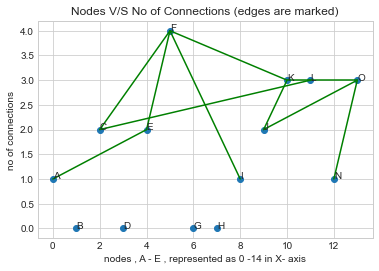

In [14]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.scatter(x,to_plot)
for i, txt in enumerate(nodes):
    plt.annotate(txt, (x[i], to_plot[i]))
# A - E
x1 = [0,4]
y1 = [1,2]
# plotting the line 1 points 
plt.plot(x1, y1,color="Green")

# E - F
x2 = [4,5]
y2 = [2,4]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# F - K
x2 = [5,10]
y2 = [4,3]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# F - I
x2 = [5,8]
y2 = [4,1]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# F - C
x2 = [5,2]
y2 = [4,2]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# C - L
x2 = [2,11]
y2 = [2,3]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# L - K
x2 = [11,10]
y2 = [3,3]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# K - J
x2 = [10,9]
y2 = [3,2]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# O - J
x2 = [9,13]
y2 = [2,3]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# O - N
x2 = [13,12]
y2 = [3,1]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

# O - L
x2 = [13,11]
y2 = [3,3]
# plotting the line 2 points 
plt.plot(x2, y2,color="Green")

plt.xlabel('nodes , A - E , represented as 0 -14 in X- axis')
plt.ylabel('no of connections')
plt.title('Nodes V/S No of Connections (edges are marked)')
plt.show()

### THE END